# Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder


In [3]:
df=pd.read_csv('Academic_Performance.csv')

In [4]:
df.head()

,Roll No,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Sem7,Sem8,Average,Result
0,1,Tanuja,94,99.0,93,95.0,94,98.0,97.0,91.0,95.125,PASS
1,2,Gauri,81,98.0,97,99.0,98,99.0,94.0,90.0,94.500,PASS
2,3,Vaishnavi,65,45.0,27,89.0,19,11.0,48.0,63.0,45.875,PASS
3,4,Srushti,81,49.0,99,82.0,12,76.0,58.0,77.0,61.750,PASS
4,5,Deepti,78,16.0,13,73.0,44,83.0,57.0,57.0,47.625,PASS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll No  30 non-null     int64  
 1   Name     30 non-null     object 
 2   Sem1     30 non-null     int64  
 3   Sem2     29 non-null     float64
 4   Sem3     30 non-null     int64  
 5   Sem4     29 non-null     float64
 6   Sem5     30 non-null     int64  
 7   Sem6     29 non-null     float64
 8   Sem7     28 non-null     float64
 9   Sem8     29 non-null     float64
 10  Average  30 non-null     float64
 11  Result   27 non-null     object 
dtypes: float64(6), int64(4), object(2)
memory usage: 2.9+ KB


In [6]:
df.isnull().sum()

Roll No    0
Name       0
Sem1       0
Sem2       1
Sem3       0
Sem4       1
Sem5       0
Sem6       1
Sem7       2
Sem8       1
Average    0
Result     3
dtype: int64

In [7]:
df['Sem2']= df['Sem2'].fillna(df['Sem2'].mean())

In [8]:
df.isnull().sum()

Roll No    0
Name       0
Sem1       0
Sem2       0
Sem3       0
Sem4       1
Sem5       0
Sem6       1
Sem7       2
Sem8       1
Average    0
Result     3
dtype: int64

In [9]:
normalized = (df['Average'] - df['Average'].min()) / (df['Average'].max() - df['Average'].min())

In [21]:
normalized

0     1.000000
1     0.990507
2     0.251966
3     0.493084
4     0.278546
5     0.278546
6     0.185517
7     0.436127
8     0.255763
9     0.105777
10    0.405750
11    0.162734
12    0.335503
13    0.278546
14    0.210469
15    0.155140
16    0.000000
17    0.244372
18    0.088690
19    0.046922
20    0.095471
21    0.400054
22    0.115270
23    0.253865
24    0.069704
25    0.125848
26    0.527258
27    0.314619
28    0.250068
29    0.128560
Name: Average, dtype: float64

In [24]:
df["Average"] = normalized
df["Average"]

1     0.990507
2     0.251966
3     0.493084
4     0.278546
5     0.278546
6     0.185517
7     0.436127
8     0.255763
9     0.105777
10    0.405750
11    0.162734
14    0.210469
15    0.155140
16    0.000000
17    0.244372
18    0.088690
19    0.046922
23    0.253865
24    0.069704
25    0.125848
26    0.527258
27    0.314619
28    0.250068
Name: Average, dtype: float64

In [11]:
# Fill missing values in 'Result' column based on condition
df.loc[df['Average'] > 45, 'Result'] = df.loc[df['Average'] > 45, 'Result'].fillna('PASS')
df.loc[df['Average'] <= 45, 'Result'] = df.loc[df['Average'] <= 45, 'Result'].fillna('FAIL')


In [12]:
df.isnull().sum()

Roll No    0
Name       0
Sem1       0
Sem2       0
Sem3       0
Sem4       1
Sem5       0
Sem6       1
Sem7       2
Sem8       1
Average    0
Result     0
dtype: int64

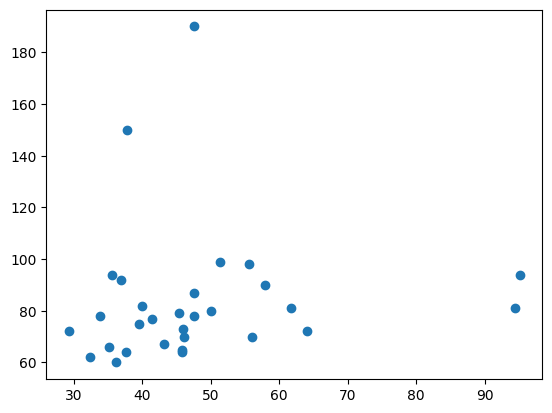

In [13]:
plt.scatter(df['Average'],df['Sem1'])

In [14]:
outliers1=np.where(df['Sem1']>90)
print(outliers1)
df=df.drop(outliers1[0])

(array([ 0, 12, 13, 20, 21, 22, 29], dtype=int64),)


,Roll No,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Sem7,Sem8,Average,Result
1,2,Gauri,81,98.000000,97,99.0,98,99.0,94.0,90.0,94.500000,PASS
2,3,Vaishnavi,65,45.000000,27,89.0,19,11.0,48.0,63.0,45.875000,PASS
3,4,Srushti,81,49.000000,99,82.0,12,76.0,58.0,77.0,61.750000,PASS
4,5,Deepti,78,16.000000,13,73.0,44,83.0,57.0,57.0,47.625000,PASS
5,6,Sakshi,87,40.000000,64,37.0,14,66.0,67.0,46.0,47.625000,PASS
6,7,Mahee,77,42.344828,15,56.0,43,81.0,NaN,17.0,41.500000,FAIL
7,8,Jui,90,49.000000,95,80.0,19,53.0,94.0,24.0,58.000000,PASS
8,9,Neha,70,12.000000,33,73.0,48,70.0,72.0,31.0,46.125000,PASS
9,10,Riya,60,12.000000,70,77.0,20,28.0,64.0,19.0,36.250000,FAIL
10,11,Manu,70,54.000000,82,38.0,34,73.0,48.0,77.0,56.000000,PASS


In [15]:
outliers2=np.where(df['Sem1']<60)
print(outliers2)
df=df.drop(outliers2[0])
df

(array([], dtype=int64),)


,Roll No,Name,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Sem7,Sem8,Average,Result
1,2,Gauri,81,98.000000,97,99.0,98,99.0,94.0,90.0,94.500000,PASS
2,3,Vaishnavi,65,45.000000,27,89.0,19,11.0,48.0,63.0,45.875000,PASS
3,4,Srushti,81,49.000000,99,82.0,12,76.0,58.0,77.0,61.750000,PASS
4,5,Deepti,78,16.000000,13,73.0,44,83.0,57.0,57.0,47.625000,PASS
5,6,Sakshi,87,40.000000,64,37.0,14,66.0,67.0,46.0,47.625000,PASS
6,7,Mahee,77,42.344828,15,56.0,43,81.0,NaN,17.0,41.500000,FAIL
7,8,Jui,90,49.000000,95,80.0,19,53.0,94.0,24.0,58.000000,PASS
8,9,Neha,70,12.000000,33,73.0,48,70.0,72.0,31.0,46.125000,PASS
9,10,Riya,60,12.000000,70,77.0,20,28.0,64.0,19.0,36.250000,FAIL
10,11,Manu,70,54.000000,82,38.0,34,73.0,48.0,77.0,56.000000,PASS


In [16]:
df.drop(columns='Sem7',inplace=True)

In [17]:
df.isnull().sum()

Roll No    0
Name       0
Sem1       0
Sem2       0
Sem3       0
Sem4       1
Sem5       0
Sem6       0
Sem8       1
Average    0
Result     0
dtype: int64

C:\Users\Reva\AppData\Local\Temp\ipykernel_16148\4191905136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average'])


<AxesSubplot: xlabel='Average', ylabel='Density'>

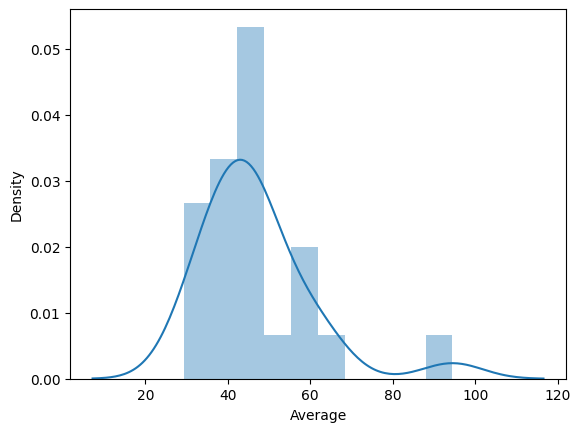

In [18]:
sns.distplot(df['Average'])

In [19]:
z= (df['Average']+df['Average'].mean())/df['Average'].std()
z

1     10.257314
2      6.728429
3      7.880533
4      6.855433
5      6.855433
6      6.410920
7      7.608382
8      6.746572
9      6.029909
10     7.463236
11     6.302060
14     6.530148
15     6.265773
16     5.524487
17     6.692142
18     5.948264
19     5.748687
23     6.737501
24     5.857547
25     6.125810
26     8.043823
27     7.027795
28     6.719357
Name: Average, dtype: float64

In [31]:
df['Average']=z

In [32]:
z

0     9.285085
1     9.244513
2     6.087955
3     7.118502
4     6.201559
5     6.201559
6     5.803946
7     6.875066
8     6.104184
9     5.463136
10    6.745233
11    5.706572
12    6.444995
13    6.201559
14    5.910595
15    5.674114
16    5.011040
17    6.055497
18    5.390105
19    5.211585
20    5.419085
21    6.720890
22    5.503708
23    6.096070
24    5.308959
25    5.548918
26    7.264564
27    6.355735
28    6.079841
29    5.560510
Name: Average, dtype: float64

C:\Users\Reva\AppData\Local\Temp\ipykernel_18568\4191905136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average'])


<AxesSubplot: xlabel='Average', ylabel='Density'>

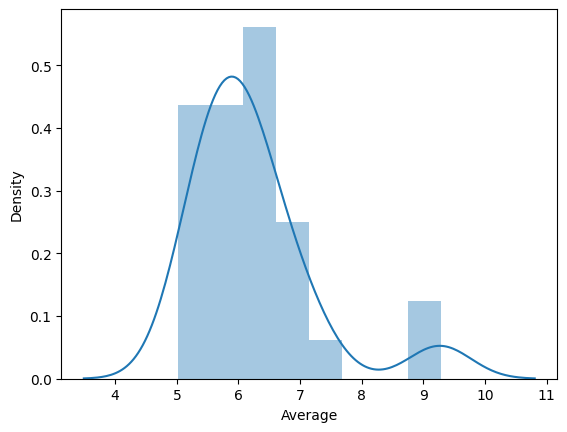

In [33]:
sns.distplot(df['Average'])